In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio

import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# changing dir and loading images in the folder
# changing dir and loading images in the folder
filepath = "C:\\Users\\CyberOps\\agubalanceface"
os.chdir(filepath)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c7b42a77-7f7e-1ee4-bab6-b0975b331a65)


In [4]:
# Install tf-nightly (required until 2.13.0+ is the default in Google Colab)
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

TensorFlow version: 2.17.0-dev20240310
Notebook last run (end-to-end): 2024-03-12 11:35:21.888439


In [3]:
onlyfiles = os.listdir()
len(onlyfiles)

6840

['23', '13', '24', '17', '22', '29', '30', '21', '18', '14', '22', '19', '21', '20', '23', '26', '21', '26', '26', '16', '28', '13', '22', '16', '19', '23', '21', '22', '21', '21', '13', '21', '23', '26', '15', '30', '21', '16', '18', '15', '29', '18', '26', '30', '20', '24', '15', '26', '23', '30', '20', '26', '24', '13', '23', '24', '13', '14', '24', '25', '21', '15', '24', '26', '16', '25', '21', '17', '23', '25', '27', '17', '16', '24', '29', '26', '20', '27', '22', '16', '23', '19', '27', '18', '30', '17', '27', '14', '30', '27', '20', '26', '20', '21', '30', '15', '25', '27', '24', '19', '30', '25', '17', '20', '27', '25', '24', '20', '16', '19', '21', '25', '16', '16', '28', '19', '15', '13', '13', '15', '21', '15', '26', '28', '30', '13', '25', '28', '19', '16', '27', '26', '14', '13', '28', '30', '29', '17', '15', '30', '24', '28', '13', '27', '17', '15', '25', '17', '24', '23', '22', '30', '25', '25', '29', '29', '20', '26', '19', '15', '27', '23', '17', '17', '28', '21', '15

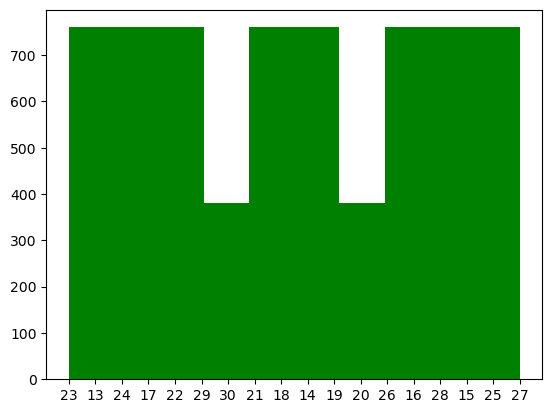

In [4]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]
print (age)

nbins = 10
plt.hist(age,nbins,color='green',histtype='bar')
plt.show()

In [5]:
print(len(age))

6840


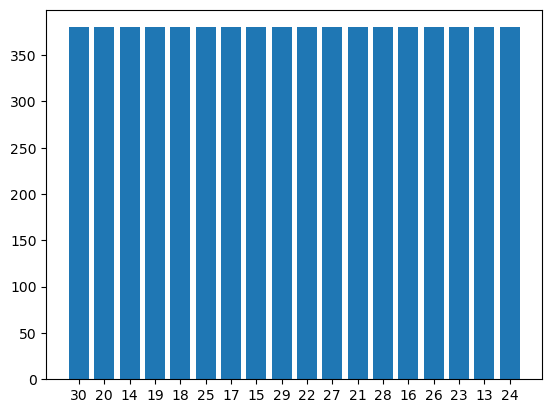

Max value: 30


In [6]:
import matplotlib.pyplot as plt
x_age = list(set(age))
y_age = [age.count(i) for i in x_age]
plt.bar(x_age,y_age)
plt.show()
print("Max value:",max(age))

In [7]:
classes = []
for i in age:
  if(i!="model.png" and "model"):
      i = int(i)

      if (i>=13) and (i<=17):
          classes.append(0)
      if (i>=18) and (i<=25):
          classes.append(1)
      if (i>=26) and (i<=30):
          classes.append(2)

In [8]:
print(len(classes))

6840


In [9]:


classes[:3]

print(len(classes))

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

6840


(6840, 3)

CONVERT IMAGES TO VECTORS

In [10]:
X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      face=imageio.imread(file,pilmode="RGB")
      face =cv2.resize(face, (224, 224))
      X_data.append(face)


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_12980\461346239.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face=imageio.imread(file,pilmode="RGB")


In [11]:
X = np.squeeze(X_data)
X.shape


(6840, 224, 224, 3)

In [12]:

# normalize data
X = X.astype('float32')
X /= 255

classes[:3]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels[:3]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [13]:
print(X.shape)


(6840, 224, 224, 3)


In [14]:
#Visualize data by pandas

age_labels = pd.Series(list(categorical_labels), name = 'Ages')


label = pd.concat([age_labels], axis = 1)
label.shape

(6840, 1)

In [15]:
categorical_labels.shape

(6840, 3)

In [21]:
IMAGE_SIZE = (225,225,3)

In [16]:
IMG_SHAPE = (224,224,3)
mobileNet_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [17]:
mobileNet_model .trainable = False

In [18]:
mobileNet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [19]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_mobilenet_model= models.Sequential([
    mobileNet_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [20]:
custom_mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                        

Model Creation

In [21]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_class, y_test_class  = train_test_split(X, categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test,y_val_class, y_test_class= train_test_split(x_test,  y_test_class,test_size=test_ratio/(test_ratio + validation_ratio))

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (4787, 224, 224, 3)  Validation Image Size (1368, 224, 224, 3) Testing Image Size  (685, 224, 224, 3)
Training Label Size (4787, 3) validation Label Size (1368, 3) Testing Image Size (685, 3)


In [22]:

custom_mobilenet_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])




#save the model history in a list after fitting so that we can plot later
model_history = []
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_history=custom_mobilenet_model.fit(x_train,y_train_class, batch_size=64,epochs=50,validation_data=(x_val, y_val_class),callbacks=[early_stopping])




Epoch 1/50
75/75 [==============================] - 104s 1s/step - loss: 0.6777 - accuracy: 0.7322 - val_loss: 0.1452 - val_accuracy: 0.9481
Epoch 2/50
75/75 [==============================] - 99s 1s/step - loss: 0.0518 - accuracy: 0.9873 - val_loss: 0.0538 - val_accuracy: 0.9817
Epoch 3/50
75/75 [==============================] - 97s 1s/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 4/50
75/75 [==============================] - 93s 1s/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0815 - val_accuracy: 0.9803
Epoch 5/50
75/75 [==============================] - 90s 1s/step - loss: 0.0277 - accuracy: 0.9902 - val_loss: 0.9197 - val_accuracy: 0.8041
Epoch 6/50
75/75 [==============================] - 89s 1s/step - loss: 0.1184 - accuracy: 0.9626 - val_loss: 0.1030 - val_accuracy: 0.9773
Epoch 7/50
75/75 [==============================] - 92s 1s/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1113 - val_accuracy: 0.9773


In [23]:
custom_mobilenet_model.evaluate(x_test,y_test_class)

22/22 [==============================] - 10s 467ms/step - loss: 0.0553 - accuracy: 0.9796


[0.05527555197477341, 0.9795620441436768]

In [ ]:
#model.compile(loss = 'mean_squared_error', optimizer="adam", metrics = ['accuracy'])

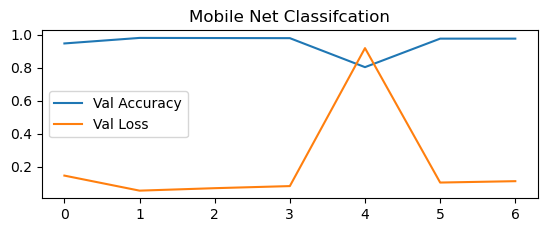

In [24]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Mobile Net Classifcation')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.plot(model_history.history['val_loss'], label='Val Loss')
plt.legend()

Define some callbacks

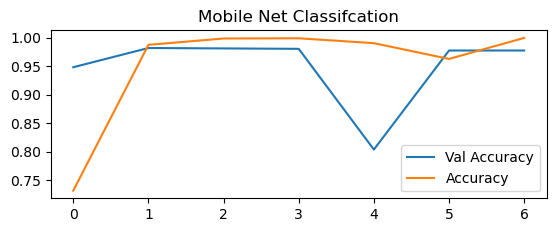

In [25]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Mobile Net Classifcation')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.plot(model_history.history['accuracy'], label='Accuracy')
plt.legend()

In [32]:
yhat = custom_mobilenet_model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step


In [27]:
from sklearn.metrics import classification_report

yhat=custom_mobilenet_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

22/22 [==============================] - 6s 259ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       191
           1       0.98      0.98      0.98       295
           2       0.98      0.96      0.97       199

    accuracy                           0.98       685
   macro avg       0.98      0.98      0.98       685
weighted avg       0.98      0.98      0.98       685



[[191   0   0]
 [  4 288   3]
 [  2   5 192]]
(685, 3)


<AxesSubplot:>

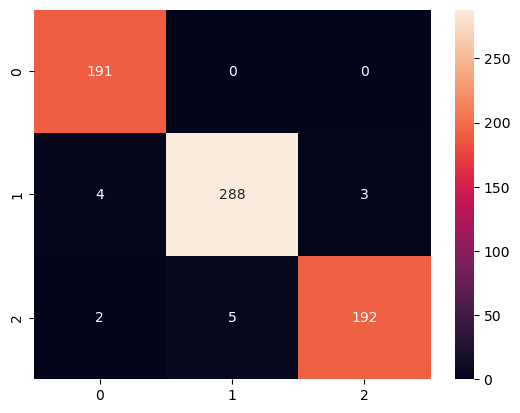

In [28]:
y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)

In [29]:
labels =[
    "(13-17)",# index 0
    "(18-25)" ,# index 1
        "(26-30)"# index 2
        ]

22/22 [==============================] - 6s 263ms/step


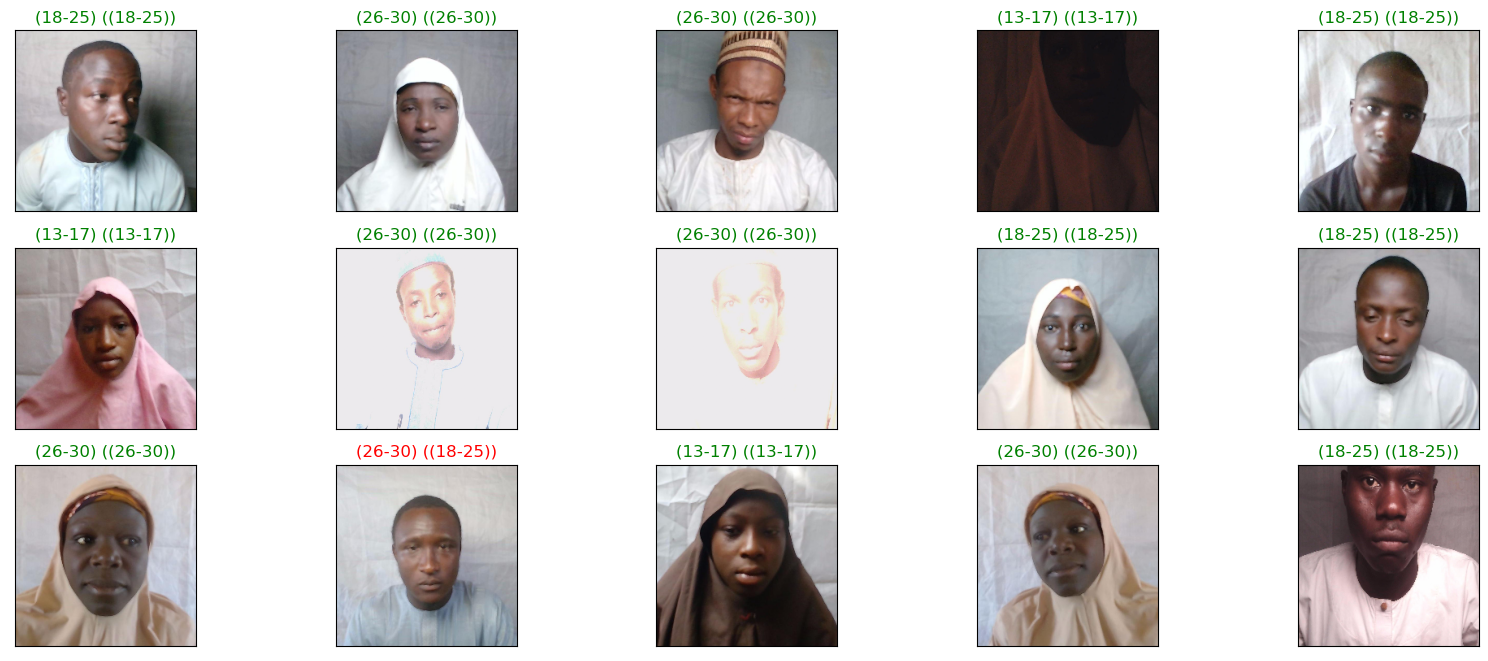

In [30]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = custom_mobilenet_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

without Cross Validation

In [31]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg16_model.trainable = False ## Not trainable weights

checking the model performance

In [32]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_vgg16_model= models.Sequential([
    vgg16_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [33]:
custom_vgg16_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])



#save the model history in a list after fitting so that we can plot later
model_historyA = []
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyA=custom_vgg16_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])


Epoch 1/70
75/75 [==============================] - 942s 13s/step - loss: 0.6534 - accuracy: 0.7115 - val_loss: 0.3627 - val_accuracy: 0.8765
Epoch 2/70
75/75 [==============================] - 956s 13s/step - loss: 0.1674 - accuracy: 0.9417 - val_loss: 0.1244 - val_accuracy: 0.9510
Epoch 3/70
75/75 [==============================] - 1205s 16s/step - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.0854 - val_accuracy: 0.9751
Epoch 4/70
75/75 [==============================] - 1252s 17s/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 0.1211 - val_accuracy: 0.9730
Epoch 5/70
75/75 [==============================] - 1277s 17s/step - loss: 0.0807 - accuracy: 0.9685 - val_loss: 0.0786 - val_accuracy: 0.9817
Epoch 6/70
75/75 [==============================] - 1486s 20s/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.1401 - val_accuracy: 0.9635
Epoch 7/70
75/75 [==============================] - 1593s 21s/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0635 - val_accuracy: 0.9825
E

In [34]:
from sklearn.metrics import classification_report
yhat = custom_vgg16_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

22/22 [==============================] - 146s 7s/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       191
           1       0.99      0.98      0.98       295
           2       1.00      0.98      0.99       199

    accuracy                           0.99       685
   macro avg       0.98      0.99      0.99       685
weighted avg       0.99      0.99      0.99       685



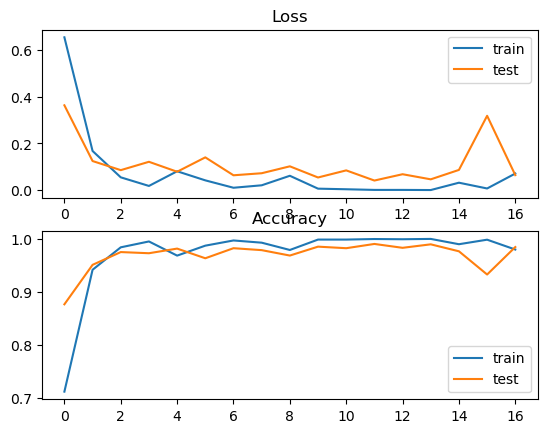

In [35]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyA.history['loss'], label='train')
plt.plot(model_historyA.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyA.history['accuracy'], label='train')
plt.plot(model_historyA.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Cross Validation Accuracy

[[190   1   0]
 [  6 289   0]
 [  1   2 196]]
(685, 3)


<AxesSubplot:>

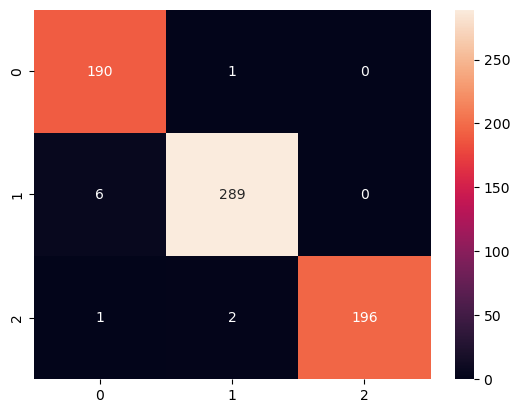

In [36]:
y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)

22/22 [==============================] - 146s 7s/step


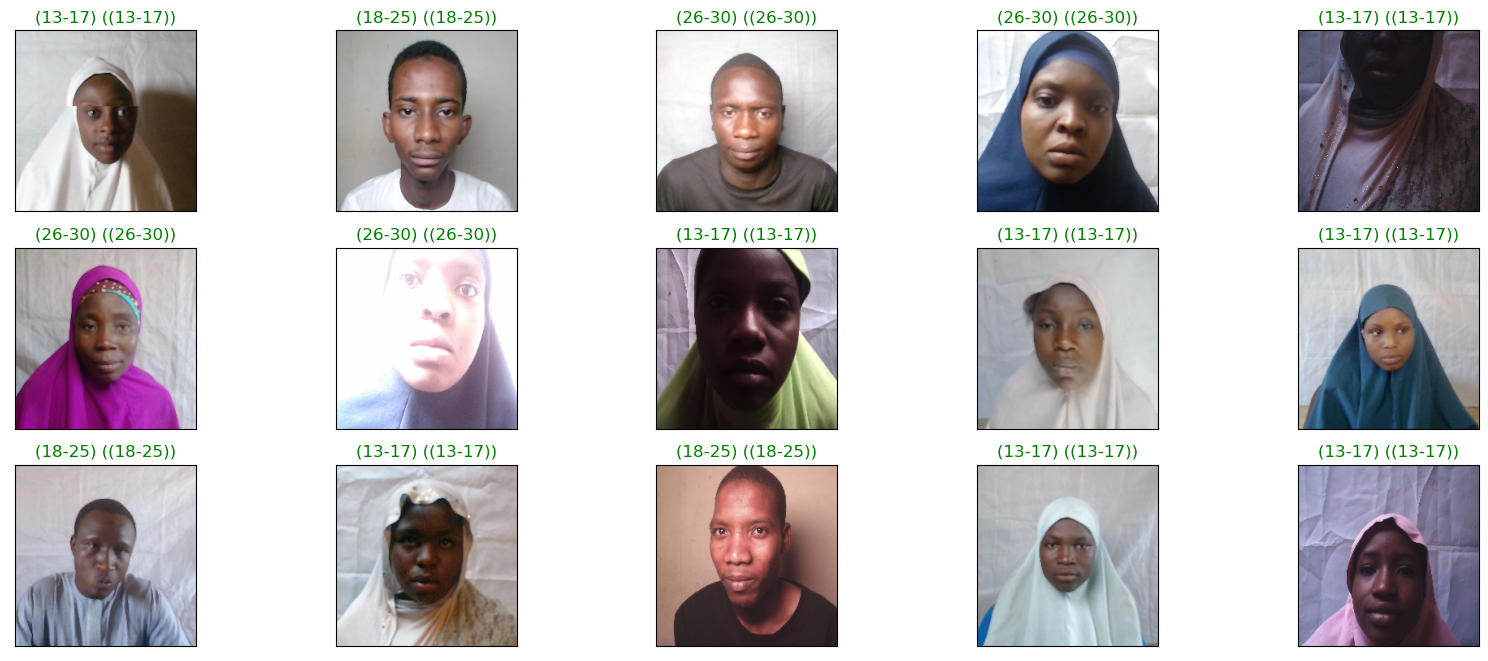

In [37]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = custom_vgg16_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

Grouping the labels to desired class{ child, teenager, and adult}

In [38]:
from keras.applications.vgg19 import VGG19

In [39]:

## Loading VGG19 model
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg19_model.trainable = False ## Not trainable weights

In [40]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_vgg19_model= models.Sequential([
    vgg19_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [41]:
custom_vgg19_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])




#save the model history in a list after fitting so that we can plot later
model_historyB = []
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyB=custom_vgg19_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])


Epoch 1/70
75/75 [==============================] - 1530s 20s/step - loss: 0.8015 - accuracy: 0.6305 - val_loss: 0.7093 - val_accuracy: 0.7113
Epoch 2/70
75/75 [==============================] - 1527s 20s/step - loss: 0.3214 - accuracy: 0.8755 - val_loss: 0.3190 - val_accuracy: 0.8801
Epoch 3/70
75/75 [==============================] - 1505s 20s/step - loss: 0.1569 - accuracy: 0.9436 - val_loss: 0.0887 - val_accuracy: 0.9686
Epoch 4/70
75/75 [==============================] - 1502s 20s/step - loss: 0.0866 - accuracy: 0.9693 - val_loss: 0.0760 - val_accuracy: 0.9759
Epoch 5/70
75/75 [==============================] - 1491s 20s/step - loss: 0.0268 - accuracy: 0.9942 - val_loss: 0.2181 - val_accuracy: 0.9254
Epoch 6/70
75/75 [==============================] - 1501s 20s/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.0485 - val_accuracy: 0.9854
Epoch 7/70
75/75 [==============================] - 1496s 20s/step - loss: 0.1111 - accuracy: 0.9687 - val_loss: 0.0590 - val_accuracy: 0.9825

Saving the model

In [42]:
from sklearn.metrics import classification_report
yhat = custom_vgg19_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

22/22 [==============================] - 167s 8s/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.98      0.97      0.97       295
           2       0.99      0.98      0.98       199

    accuracy                           0.98       685
   macro avg       0.98      0.98      0.98       685
weighted avg       0.98      0.98      0.98       685



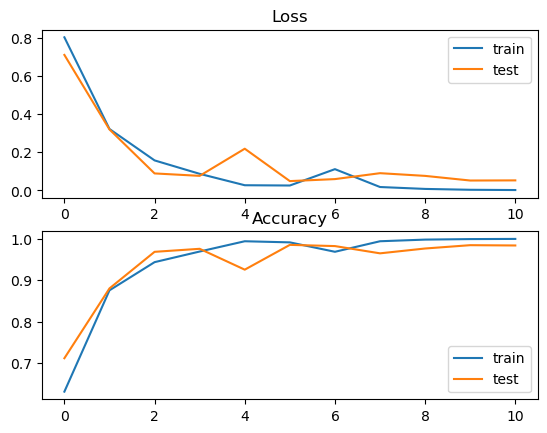

In [43]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyB.history['loss'], label='train')
plt.plot(model_historyB.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyB.history['accuracy'], label='train')
plt.plot(model_historyB.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Implementing our model

In [44]:
resnet50model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False,  input_shape=x_train[0].shape)
for layer in resnet50model.layers:
    layer.trainable = False


In [45]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_ResNet50_model= models.Sequential([
    resnet50model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [46]:
custom_ResNet50_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])




#save the model history in a list after fitting so that we can plot later
model_historyC = []
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyC=custom_ResNet50_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])

Epoch 1/70
75/75 [==============================] - 424s 6s/step - loss: 1.2100 - accuracy: 0.3944 - val_loss: 1.0357 - val_accuracy: 0.4481
Epoch 2/70
75/75 [==============================] - 415s 6s/step - loss: 1.0081 - accuracy: 0.4876 - val_loss: 1.0069 - val_accuracy: 0.4744
Epoch 3/70
75/75 [==============================] - 416s 6s/step - loss: 0.9279 - accuracy: 0.5383 - val_loss: 1.0155 - val_accuracy: 0.4452
Epoch 4/70
75/75 [==============================] - 420s 6s/step - loss: 0.8614 - accuracy: 0.5893 - val_loss: 0.8983 - val_accuracy: 0.5526
Epoch 5/70
75/75 [==============================] - 426s 6s/step - loss: 0.8385 - accuracy: 0.6064 - val_loss: 0.8180 - val_accuracy: 0.6228
Epoch 6/70
75/75 [==============================] - 429s 6s/step - loss: 0.8188 - accuracy: 0.6083 - val_loss: 0.8129 - val_accuracy: 0.6104
Epoch 7/70
75/75 [==============================] - 418s 6s/step - loss: 0.7578 - accuracy: 0.6557 - val_loss: 0.8395 - val_accuracy: 0.6038
Epoch 8/70
75

In [47]:
from sklearn.metrics import classification_report
yhat = custom_ResNet50_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

22/22 [==============================] - 48s 2s/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       191
           1       0.81      0.83      0.82       295
           2       0.85      0.76      0.80       199

    accuracy                           0.81       685
   macro avg       0.81      0.81      0.81       685
weighted avg       0.81      0.81      0.81       685



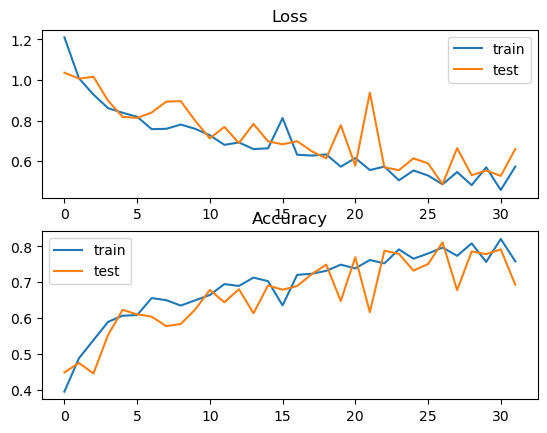

In [48]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyC.history['loss'], label='train')
plt.plot(model_historyC.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyC.history['accuracy'], label='train')
plt.plot(model_historyC.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [50]:
custom_ResNet50_model.save('ResNet50_class.h5')
custom_vgg19_model.save('VGG19_class.h5')
custom_mobilenet_model.save('MobileNet_class.h5')
custom_vgg16_model.save('VGG16_class.h5')
